In [1]:
import pandas as pd
import cPickle as pkl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
#transcript_file = '../../data/FISH_RNAseq_combined_FACS_phases_7_genes.xlsx'
transcript_file = '../../data/FISH_RNAseq_combined_FACS_phases_7_genes_new_CC_phases.xlsx'

In [3]:
transcript_data = pd.read_excel(transcript_file, sheetname='nostress_WT_R1_rounded', 
                                skiprows=1, skipfooter=2, parse_cols='A, D:P')

In [4]:
transcript_data.head()

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60
0,YAL001C,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,YAL002W,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,YAL003W,53.0,42.0,83.0,89.0,88.0,38.0,38.0,39.0,27.0,47.0,23.0,46.0,31.0
3,YAL004W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,YAL005C,79.0,71.0,107.0,81.0,86.0,31.0,35.0,37.0,41.0,34.0,26.0,46.0,30.0


In [5]:
len(transcript_data)

6701

In [6]:
genes_shortlist = {"$\mathit{HHF1}$": 'YBR009C', "$\mathit{HHF2}$": 'YNL030W', "$\mathit{HHT1}$": 'YBR010W', 
                   "$\mathit{HHT2}$": 'YNL031C', "$\mathit{HTB1}$": 'YDR224C', 
                   "$\mathit{HTB2}$": 'YBL002W', "$\mathit{PMA1}$": 'YGL008C', 
                   "$\mathit{RNR1}$": 'YER070W', "$\mathit{RNR2}$": 'YJL026W', 
                   #'RNR3': 'YIL066C', 
                   "$\mathit{RNR4}$": 'YGR180C', 
                   # genes suggested by Katja, some histones
                   #'SIC1': 'YLR079W', 
                   #'CLN2': 'YPL256C', 
                   #'CLB2': 'YPR119W', 
                   #'CLB5': 'YPR120C', 
                   #'PCL1': 'YNL289W', 
                   #'PCL9': 'YDL179W', 
                   #'SWE1': 'YJL187C'
                  } # FISH genes

In [7]:
inverse_genes_shortlist = {v: k for (k, v) in genes_shortlist.iteritems()}

In [8]:
inverse_genes_shortlist

{'YBL002W': '$\\mathit{HTB2}$',
 'YBR009C': '$\\mathit{HHF1}$',
 'YBR010W': '$\\mathit{HHT1}$',
 'YDR224C': '$\\mathit{HTB1}$',
 'YER070W': '$\\mathit{RNR1}$',
 'YGL008C': '$\\mathit{PMA1}$',
 'YGR180C': '$\\mathit{RNR4}$',
 'YJL026W': '$\\mathit{RNR2}$',
 'YNL030W': '$\\mathit{HHF2}$',
 'YNL031C': '$\\mathit{HHT2}$'}

In [9]:
selected_transcript_data = transcript_data[transcript_data['Gene'].isin(genes_shortlist.values())]

In [10]:
selected_transcript_data['trivial_gene'] = selected_transcript_data['Gene'].map(inverse_genes_shortlist)

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
selected_transcript_data = selected_transcript_data.set_index('trivial_gene')
del selected_transcript_data['Gene']
selected_transcript_data = selected_transcript_data.sort_index()

In [12]:
selected_transcript_data

,0,5,10,15,20,25,30,35,40,45,50,55,60
trivial_gene,,,,,,,,,,,,,
$\mathit{HHF1}$,6.0,3.0,18.0,96.0,183.0,57.0,34.0,18.0,8.0,6.0,2.0,6.0,3.0
$\mathit{HHF2}$,19.0,21.0,86.0,133.0,185.0,57.0,31.0,17.0,15.0,9.0,6.0,8.0,10.0
$\mathit{HHT1}$,6.0,6.0,20.0,72.0,122.0,31.0,15.0,9.0,4.0,3.0,2.0,3.0,2.0
$\mathit{HHT2}$,22.0,35.0,95.0,169.0,206.0,87.0,53.0,30.0,20.0,11.0,9.0,16.0,13.0
$\mathit{HTB1}$,11.0,15.0,31.0,71.0,113.0,25.0,18.0,11.0,8.0,4.0,2.0,5.0,3.0
$\mathit{HTB2}$,7.0,12.0,46.0,101.0,133.0,43.0,28.0,17.0,12.0,7.0,4.0,6.0,4.0
$\mathit{PMA1}$,9.0,11.0,18.0,10.0,19.0,9.0,8.0,11.0,8.0,12.0,7.0,15.0,8.0
$\mathit{RNR1}$,7.0,34.0,80.0,51.0,24.0,4.0,2.0,2.0,1.0,2.0,2.0,3.0,6.0
$\mathit{RNR2}$,14.0,16.0,27.0,31.0,29.0,11.0,11.0,10.0,10.0,9.0,4.0,6.0,6.0


To find the rows that do not plot well because of low counts:

In [13]:
selected_transcript_data.max(axis=1)

trivial_gene
$\mathit{HHF1}$    183.0
$\mathit{HHF2}$    185.0
$\mathit{HHT1}$    122.0
$\mathit{HHT2}$    206.0
$\mathit{HTB1}$    113.0
$\mathit{HTB2}$    133.0
$\mathit{PMA1}$     19.0
$\mathit{RNR1}$     80.0
$\mathit{RNR2}$     31.0
$\mathit{RNR4}$     32.0
dtype: float64

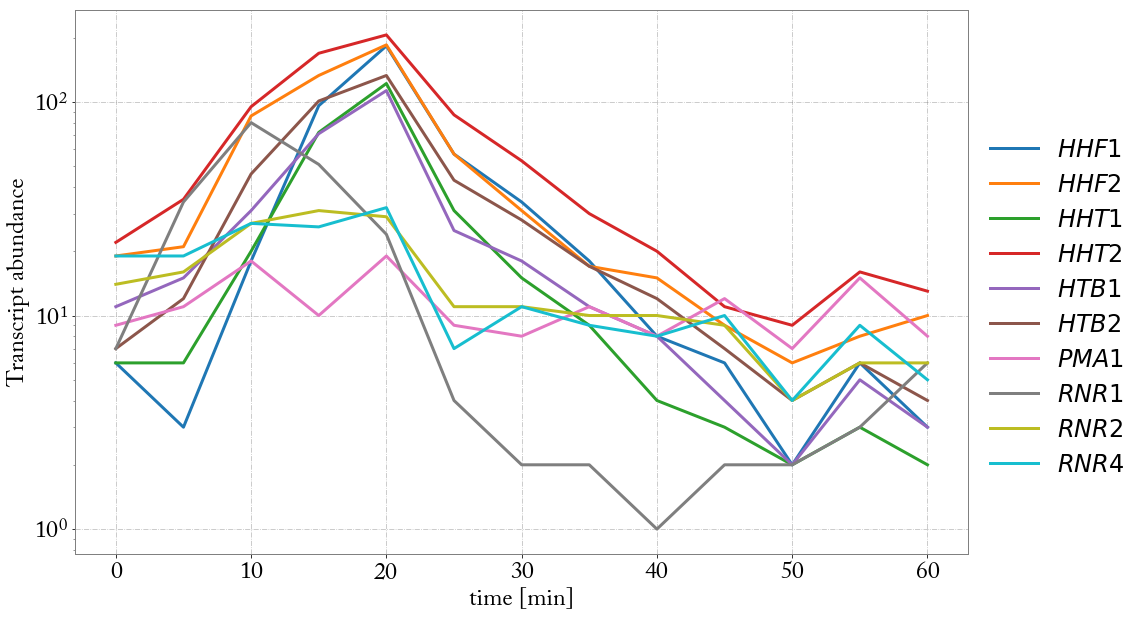

In [14]:
import matplotlib.cm as cm

pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
plt.rcParams.update(pgf_with_rc_fonts)
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='grey'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

myfontsize = 24

fig, ax = plt.subplots()
plt.tick_params(axis='both', which='major', labelsize=myfontsize)

for i, gene in enumerate(selected_transcript_data.index):
    #print gene
    #print selected_transcript_data.loc[gene]
    ax.plot(selected_transcript_data.loc[gene], label=gene, c=cm.tab10(i), linewidth=3)
    ax.set_yscale('log')
    plt.legend(loc='upper right')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.set_xlabel("time [min]", fontsize=myfontsize)
ax.set_ylabel("Transcript abundance", fontsize=myfontsize)
lgd = plt.legend(loc='lower left', bbox_to_anchor=(1, 0.1), fancybox=True, framealpha=0.0, fontsize=myfontsize)

plt.savefig('single_gene_transcript_abundances_v2.pgf', bbox_extra_artists=(lgd,), bbox_inches='tight')

It looks better in LaTeX.